In [1]:
from data_preprocessing import *
from descriptives import *
from models import *

### get and preprocess text data

In [2]:
data = get_the_data("/Users/indiakerle/Desktop/CLASSIFICATION_PROBLEM/problem/data")


for col in range(len(data)):
    data[col]["processed_text"] = data_preprocessing(data[col].comment_text)

test, train = data 

### exploring the data

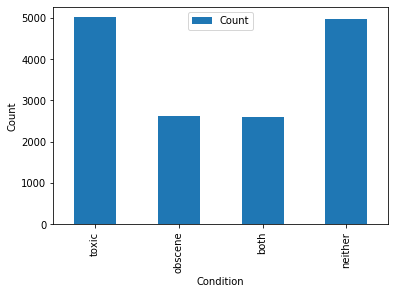

,toxic,total_length,capitals,caps_vs_length,num_exclamation_marks,num_punctuation,num_unique_words
obscene,,,,,,,
0,2415,2777558,157588,464.898467,4807,56436,335842
1,2603,721989,129204,341.493308,7855,14334,73411


In [3]:
#top 20 toxic terms
most_frequent_terms(train.processed_text[train.toxic == 1], 20)

#most frequent obscene terms
most_frequent_terms(train.processed_text[train.obscene == 1], 20)

#label counts
condition_counts(train)

#new feature exploration
new_features(train).groupby('toxic').sum()
new_features(train).groupby('obscene').sum()

### vectorise text

In [4]:
X_train, X_test, vectoriser = vectorise(train, test, 0.005, 0.9)

#### model selection - toxic

In [5]:
toxic_model_stats, toxic_mean_model, toxic_best_model, models = run_models(X_train, X_test, y_target(train.toxic))

running LogReg ...!
running decision_tree ...!
running GNB ...!
running SVM ...!


#### model selection - obscene

In [6]:
obscene_model_stats, obscene_mean_model, obscene_best_model, models = run_models(X_train, X_test, y_target(train.obscene))

running LogReg ...!
running decision_tree ...!
running GNB ...!
running SVM ...!


#### model selection - model tuning - toxic

In [7]:
best_toxic = best_tuned_model(toxic_best_model, models, X_train, y_target(train.toxic))

busy tuning LogReg...


/Users/indiakerle/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/indiakerle/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/line

Best weighted f1 score:  0.8595099002391431


#### model selection - model tuning - obscene

In [8]:
best_obscene = best_tuned_model(obscene_best_model, models, X_train, y_target(train.obscene))

busy tuning SVM...
Best weighted f1 score:  0.9059653588630281


### Predicted text based on tuned classifiers

In [9]:
predict_test_labels(test, best_toxic, best_obscene, 
                    X_train, X_test, y_target(train.toxic), y_target(train.obscene))

,id,comment,toxic,obscene
0,93ecf2cc643e5654,Agreed. The national statistics will be remove...,0,0
1,6bc2407dc8e70c5e,I can see we're going to have a great relation...,1,0
2,1d2126e84794e39d,Knob Jockey \n\nYour a fruit for deleting my P...,1,1
3,f1aa7b01aa26fdf4,"""\nThe issue wasn't that the information was u...",0,0
4,a686d7fd2a3742dd,"""\n\nWhat was that crap on Eisenhower? He was ...",1,1
5,921e7ed389d20d6c,Category:Ancient Greek sites in Serbia \nCan s...,1,0
6,70bdb1ae150f3924,Edits \n\nFine as you can't bring yourself to ...,0,0
7,9ed5e53b7c4ad1f8,What am I lying about? I changed something be...,0,0
8,f52c0ef11db72a8c,"Im so pissed off with betacommand, its just no...",1,0
9,3109f3378130048d,"""\nThe mods want people not to request all cra...",1,1
